Ajit Kolekar
Telecom Customer Churn Prediction

In [1]:
# Load Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data from csv file into data frame
df = pd.read_csv('Customer-Churn.csv')

In [3]:
# Check the first few rows of the data frame to make sure data is read correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the shape of the data frame
df.shape

(7043, 21)

### Data Cleansing

In [5]:
# Check the data types of the variables
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Change gender variable to numeric: 0 for Female and 1 for Male
df.gender= df.gender.apply(lambda x: 1 if x=='Male' else 0)

In [7]:
# Change Partner, Dependents, PhoneService, PaperlessBilling, and Churn variables to Numeric: 0 for No and 1 for Yes
df.Partner= df.Partner.apply(lambda x: 1 if x=='Yes' else 0)
df.Dependents= df.Dependents.apply(lambda x: 1 if x=='Yes' else 0)
df.PhoneService= df.PhoneService.apply(lambda x: 1 if x=='Yes' else 0)
df.PaperlessBilling= df.PaperlessBilling.apply(lambda x: 1 if x=='Yes' else 0)
df.Churn= df.Churn.apply(lambda x: 1 if x=='Yes' else 0)

In [8]:
# Change MultipleLines variable to Numeric: 0 for No, 0 for No Phone, and 1 for Yes
df.MultipleLines= df.MultipleLines.apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
# Change OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies
# variables to Numeric: 0 for No, 0 for No internet service, and 1 for Yes
df.OnlineSecurity= df.OnlineSecurity.apply(lambda x: 1 if x=='Yes' else 0)
df.OnlineBackup= df.OnlineBackup.apply(lambda x: 1 if x=='Yes' else 0)
df.DeviceProtection= df.DeviceProtection.apply(lambda x: 1 if x=='Yes' else 0)
df.TechSupport= df.TechSupport.apply(lambda x: 1 if x=='Yes' else 0)
df.StreamingTV= df.StreamingTV.apply(lambda x: 1 if x=='Yes' else 0)
df.StreamingMovies= df.StreamingMovies.apply(lambda x: 1 if x=='Yes' else 0)

In [10]:
# Use Lable Encoding to categorize InternetService variable
df["InternetService"] = df["InternetService"].astype('category')
df["InternetServiceCat"] = df["InternetService"].cat.codes
df.InternetServiceCat.value_counts()

1    3096
0    2421
2    1526
Name: InternetServiceCat, dtype: int64

In [11]:
# Use Lable Encoding to categorize Contract variable
df["Contract"] = df["Contract"].astype('category')
df["ContractCat"] = df["Contract"].cat.codes
df.ContractCat.value_counts()

0    3875
2    1695
1    1473
Name: ContractCat, dtype: int64

In [12]:
# Use Lable Encoding to categorize PaymentMethod variable
df["PaymentMethod"] = df["PaymentMethod"].astype('category')
df["PaymentMethodCat"] = df["PaymentMethod"].cat.codes
df.PaymentMethodCat.value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethodCat, dtype: int64

In [13]:
# When the TotalCharges variable was convrted to Float, it was found that there were few rows with string value ' '
# Count the string values

df.TotalCharges[df.TotalCharges == ' '].count()

11

In [14]:
# Drop the 11 rows where Total Charges are ' '
df = df.loc[df['TotalCharges'] != ' ']

In [15]:
# Confirm that the 11 rows are dropped
df.shape

(7032, 24)

In [16]:
# Change type of TotalCharges variable to Float64
df.TotalCharges = df.TotalCharges.astype('Float64')

In [17]:
# Delete CustomerID column
df = df.drop("customerID", axis=1)

In [18]:
# Check for any null records in the data frame
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
InternetServiceCat    0
ContractCat           0
PaymentMethodCat      0
dtype: int64

In [19]:
df.dtypes

gender                   int64
SeniorCitizen            int64
Partner                  int64
Dependents               int64
tenure                   int64
PhoneService             int64
MultipleLines            int64
InternetService       category
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
Contract              category
PaperlessBilling         int64
PaymentMethod         category
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
InternetServiceCat        int8
ContractCat               int8
PaymentMethodCat          int8
dtype: object

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceCat,ContractCat,PaymentMethodCat
0,0,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,2
1,1,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,0,1,3
2,1,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,3
3,1,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,2


### Exploratory Data Analysis

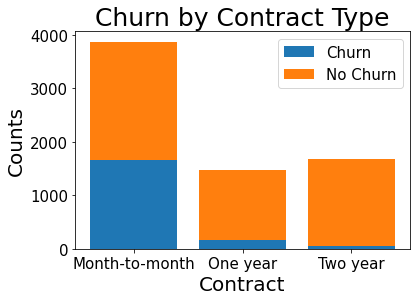

In [21]:
# Stacked bar chart to compare churn/no churn with Contract
contract_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==1]['Contract'].value_counts()
contract_no_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==0]['Contract'].value_counts()
contract_no_churn = contract_no_churn.reindex(index = contract_churn.index)

# make the bar plot
p1 = plt.bar(contract_churn.index, contract_churn.values)
p2 = plt.bar(contract_no_churn.index, contract_no_churn.values, bottom=contract_churn.values)
plt.title('Churn by Contract Type', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Contract', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 15)
plt.show()

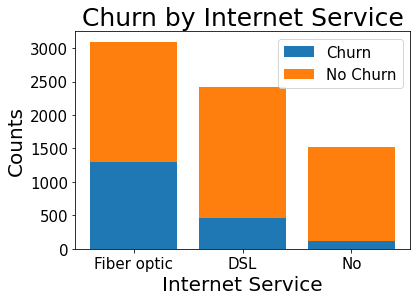

In [22]:
# Stacked bar chart to compare churn/no churn with InternetService
internet_service_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==1]['InternetService'].value_counts()
internet_service_no_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==0]['InternetService'].value_counts()
internet_service_no_churn = internet_service_no_churn.reindex(index = internet_service_churn.index)

# make the bar plot
p1 = plt.bar(internet_service_churn.index, internet_service_churn.values)
p2 = plt.bar(internet_service_no_churn.index, internet_service_no_churn.values, bottom=internet_service_churn.values)
plt.title('Churn by Internet Service', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Internet Service', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 15)
plt.show()

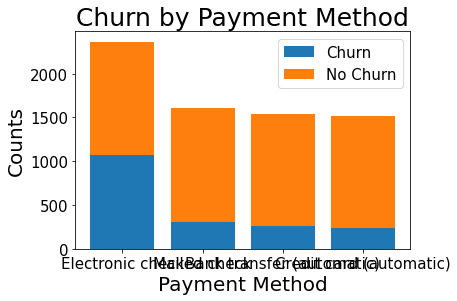

In [23]:
# Stacked bar chart to compare churn/no churn with PaymentMethod
payment_method_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==1]['PaymentMethod'].value_counts()
payment_method_no_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==0]['PaymentMethod'].value_counts()
payment_method_no_churn = payment_method_no_churn.reindex(index = payment_method_churn.index)

# make the bar plot
p1 = plt.bar(payment_method_churn.index, payment_method_churn.values)
p2 = plt.bar(payment_method_no_churn.index, payment_method_no_churn.values, bottom=payment_method_churn.values)
plt.title('Churn by Payment Method', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Payment Method', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 15)
plt.show()

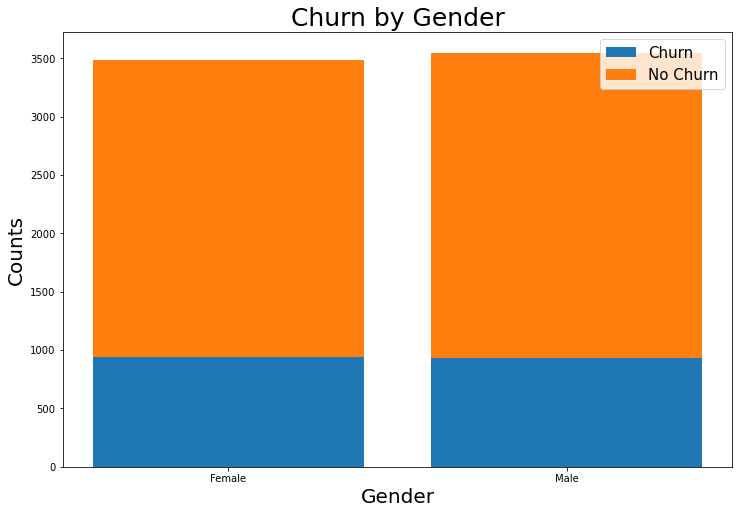

In [24]:
# Stacked bar chart to compare churn/no churn with Gender
gender_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==1]['gender'].value_counts()
gender_no_churn = df.replace({'Churn': {1: 'Churn', 0: 'No-Churn'}})[df['Churn']==0]['gender'].value_counts()
gender_no_churn = gender_no_churn.reindex(index = gender_churn.index)

# make the bar plot
plt.rcParams['figure.figsize'] = (12, 8)
p1 = plt.bar(gender_churn.index, gender_churn.values)
p2 = plt.bar(gender_no_churn.index, gender_no_churn.values, bottom=gender_churn.values)
plt.title('Churn by Gender', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.xticks([0,1], ['Female','Male'])
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'), fontsize = 15)
plt.show()

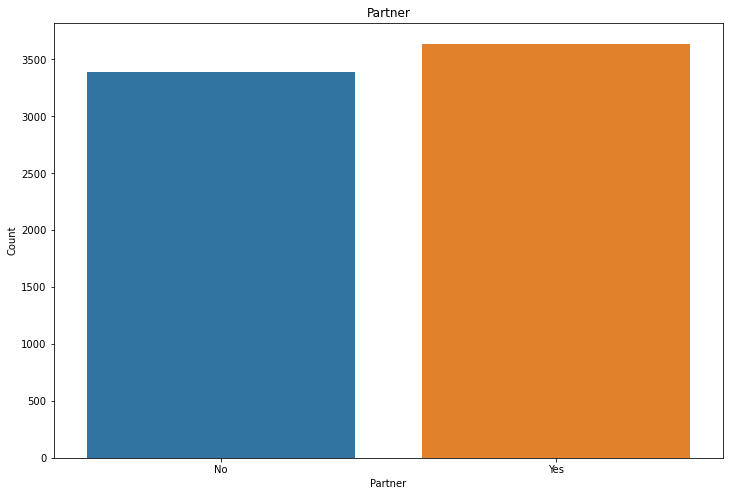

In [25]:
# Creating the bar plot for Partner
fig = plt.figure(figsize = (12, 8))
sns.barplot(x=df['Partner'], y=df['Partner'].value_counts()) 
plt.xlabel("Partner")
plt.ylabel("Count")
plt.xticks([0,1], ['No','Yes'])
plt.title("Partner")
plt.show()

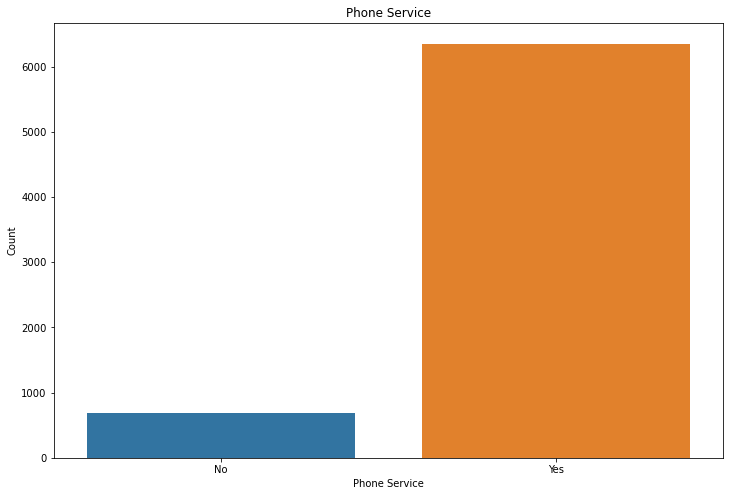

In [26]:
# Creating the bar plot for Phone Service
fig = plt.figure(figsize = (12, 8))
sns.barplot(x=df['PhoneService'], y=df['PhoneService'].value_counts()) 
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.xticks([0,1], ['No','Yes'])
plt.title("Phone Service")
plt.show()

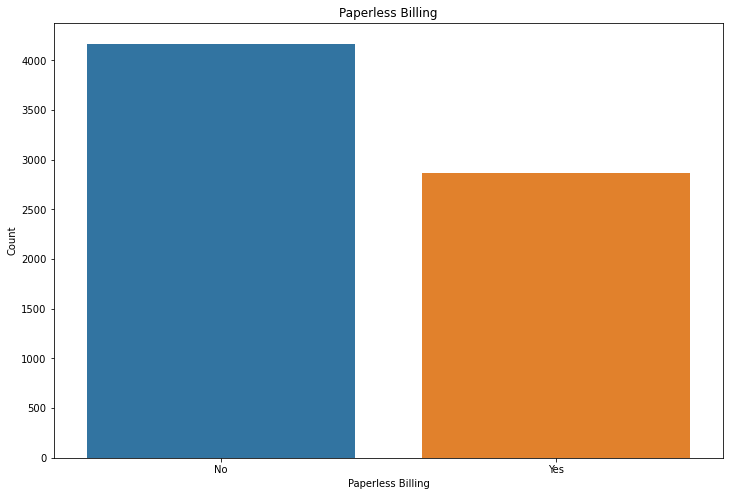

In [27]:
# Creating the bar plot for Paperless Billing
fig = plt.figure(figsize = (12, 8))
sns.barplot(x=df['PaperlessBilling'], y=df['PaperlessBilling'].value_counts()) 
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.xticks([0,1], ['No','Yes'])
plt.title("Paperless Billing")
plt.show()

<AxesSubplot:>

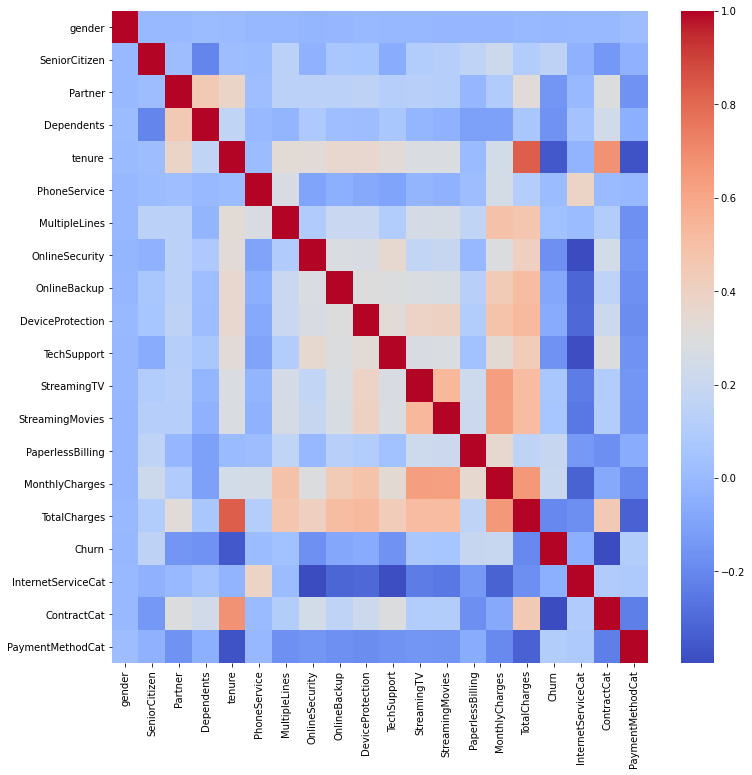

In [28]:
# Pearson Correlation Matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='coolwarm')

### Prep the data

In [29]:
# Combine the numerical features 
features_model = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                  'MonthlyCharges','TotalCharges','InternetServiceCat','ContractCat','PaymentMethodCat']
data_model_X = df[features_model]

In [30]:
# Check the contents of data_model_X
data_model_X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetServiceCat,ContractCat,PaymentMethodCat
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,2
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,3
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,0,3
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,3
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,1,1,1
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,2
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,3


In [31]:
# Create data_model_y for dependent vatiable Churn
data_model_y = df.Churn

# import package to split the data into train and test
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=8)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [33]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Admission and no-admission
print('\n')
print('No. of Churn and No-Churn in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Churn and No-Churn in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  5274
No. of samples in validation set: 1758


No. of Churn and No-Churn in the training set:
0    3861
1    1413
Name: Churn, dtype: int64


No. of Churn and No-Churn in the validation set:
0    1302
1     456
Name: Churn, dtype: int64


### K Neighbors Classifier

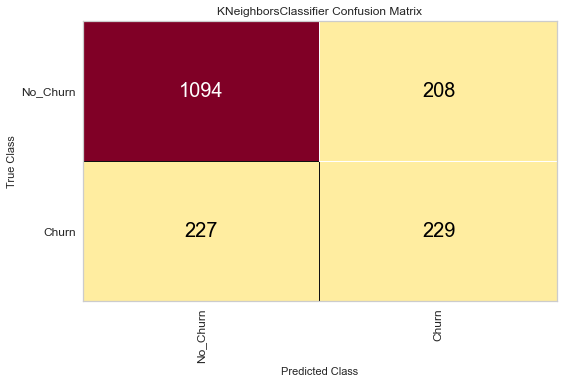

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
# Import K Neighbors Classifier 
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

#Create a model instance using K Neighbors Classifier
model = KNeighborsClassifier()

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

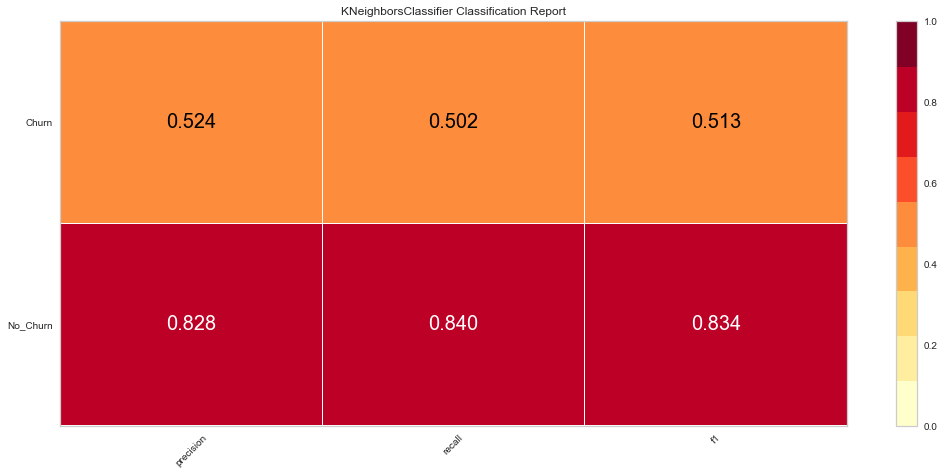

In [35]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [36]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7525597269624573


In [37]:
#Hyperparameter Tuning for K Neighbors Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
 
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.720, total=   0.1s
[CV] metric=euclidean, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=1, score=0.715, total=   0.1s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.723, total=   0.1s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.697, total=   0.1s
[CV] metric=euclidean, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=1, score=0.706, total=   0.1s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.753, total=   0.1s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.753, total=   0.1s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.752, total=   0.1s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.755, total=   0.1s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.743, total=   0.1s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.728, total=   0.1s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=13, score=0.782, total=   0.2s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.765, total=   0.1s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.760, total=   0.1s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.770, total=   0.1s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.783, total=   0.1s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.786, total=   0.1s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.765, total=   0.1s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=10, score=0.782, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.787, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.772, total=   0.1s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.771, total=   0.1s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.787, total=   0.1s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.778, total=   0.1s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.777, total=   0.1s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.7s finished


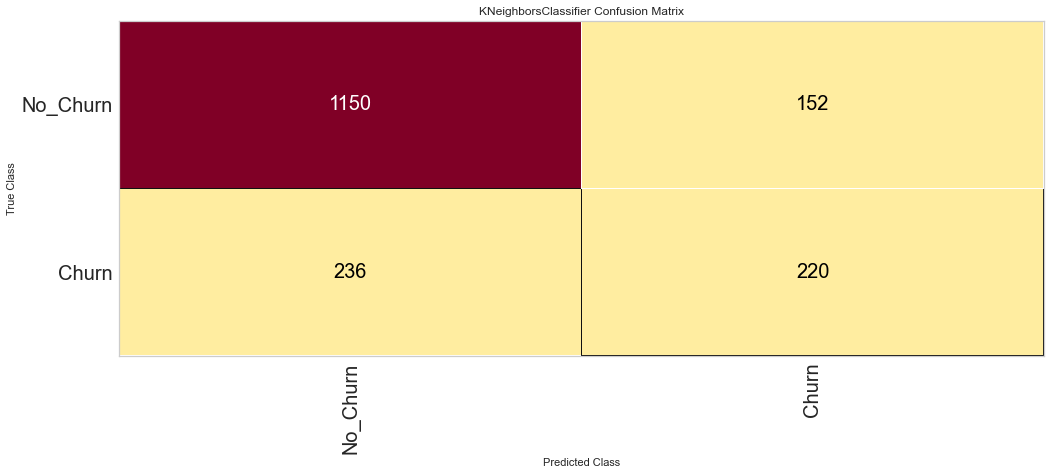

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
#Create a model instance using K Neighbors Classifier
model = KNeighborsClassifier(metric='manhattan', n_neighbors=14)

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

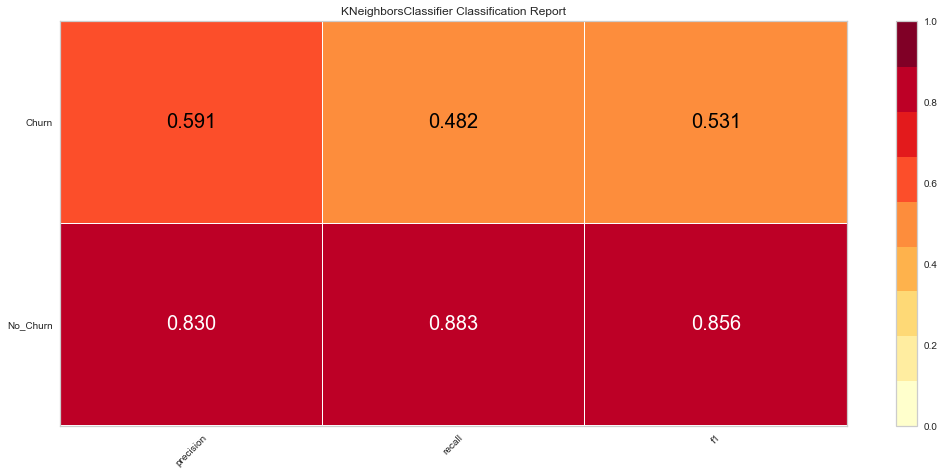

In [39]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [40]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7792946530147895


### Support Vector Classifier

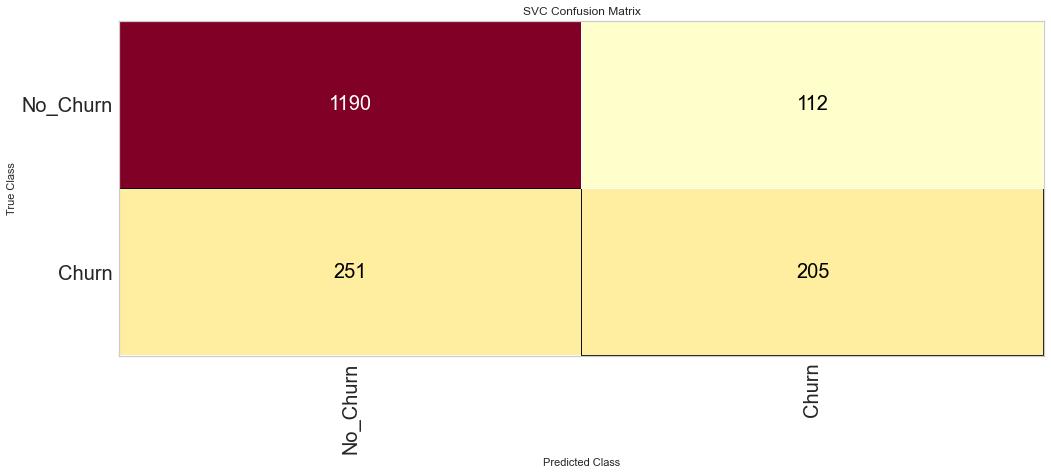

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
# Import Support Vector Classifier 
from sklearn.svm import SVC

#Create a model instance using Support Vector Classifier
model = SVC()

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

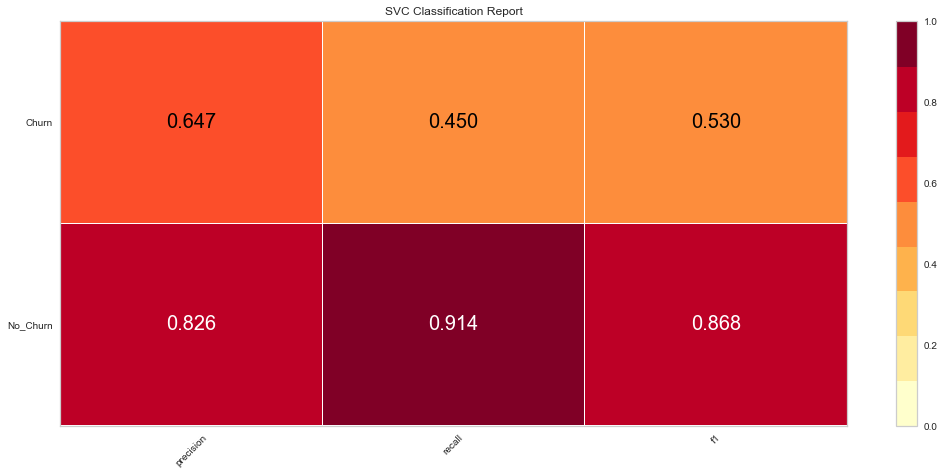

In [42]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [43]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7935153583617748


In [44]:
#Hyperparameter Tuning for Support Vector Classifier using GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.733, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.791, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.788, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.791, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.799, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.792, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.798, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.809, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.801, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.801, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.799, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.809, total=   0.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.800, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.794, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.799, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.795, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.799, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.789, total=   0.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.4min finished


Best: 0.800152 using {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.732082 (0.000410) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.784982 (0.005975) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.764695 (0.008695) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.732082 (0.000410) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.732082 (0.000410) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.763179 (0.009499) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.792188 (0.005995) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.798634 (0.002512) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.769246 (0.008771) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.732082 (0.000410) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.762990 (0.008494) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.749904 (0.005210) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.799773 (0.005198) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.798824 (0.003857) with: {'C': 10, 'gamma': 0.001, 'kern

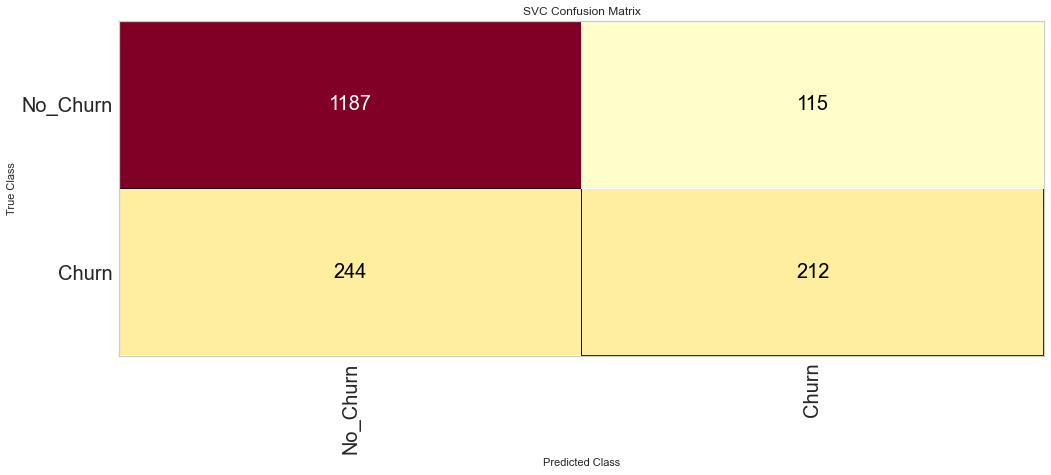

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
#Create a model instance using Support Vector Classifier
model = SVC(C=100, gamma=0.001, kernel='rbf')

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

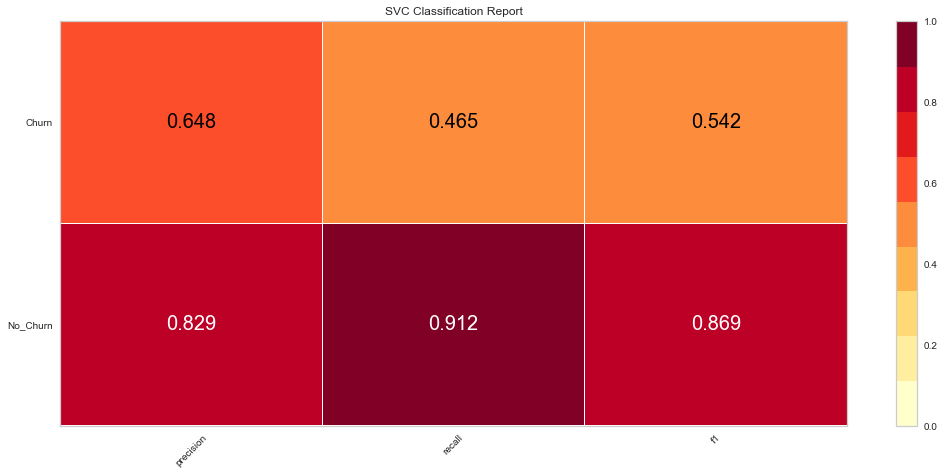

In [46]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [47]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7957906712172924


### Gradient Boosting Classifier

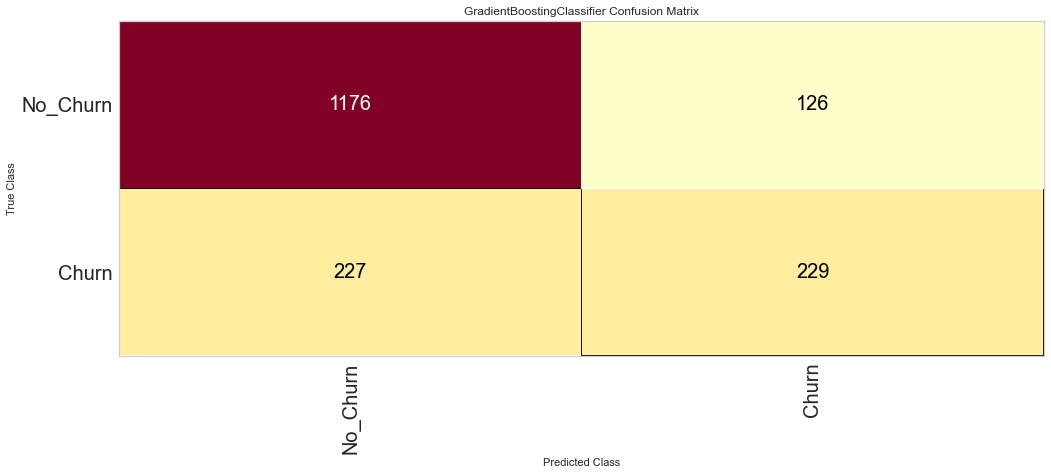

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
# Import Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier

#Create a model instance using Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

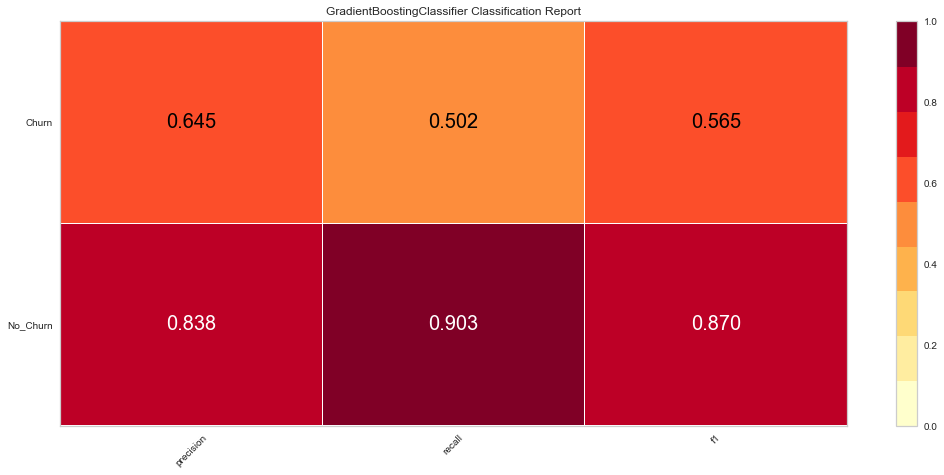

In [49]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [50]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7992036405005688


In [51]:
# Hyperparameter Tuning for Gradient Boosting Classifier using GridSearchCV
model = GradientBoostingClassifier()
estimators = {'n_estimators':range(20,81,10)}
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10), 
param_grid = estimators, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844712 using {'n_estimators': 60}
0.842757 (0.004319) with: {'n_estimators': 20}
0.844370 (0.003840) with: {'n_estimators': 30}
0.844559 (0.004342) with: {'n_estimators': 40}
0.844703 (0.004553) with: {'n_estimators': 50}
0.844712 (0.004553) with: {'n_estimators': 60}
0.844667 (0.005442) with: {'n_estimators': 70}
0.843567 (0.005439) with: {'n_estimators': 80}


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


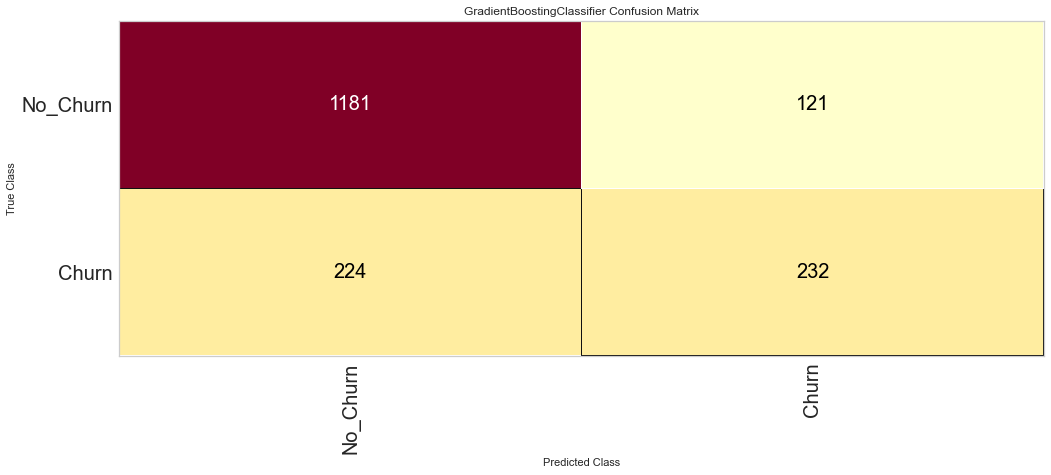

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
#Create a model instance using Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=60)

# Create Confusion Matrix
classes = ['No_Churn','Churn']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

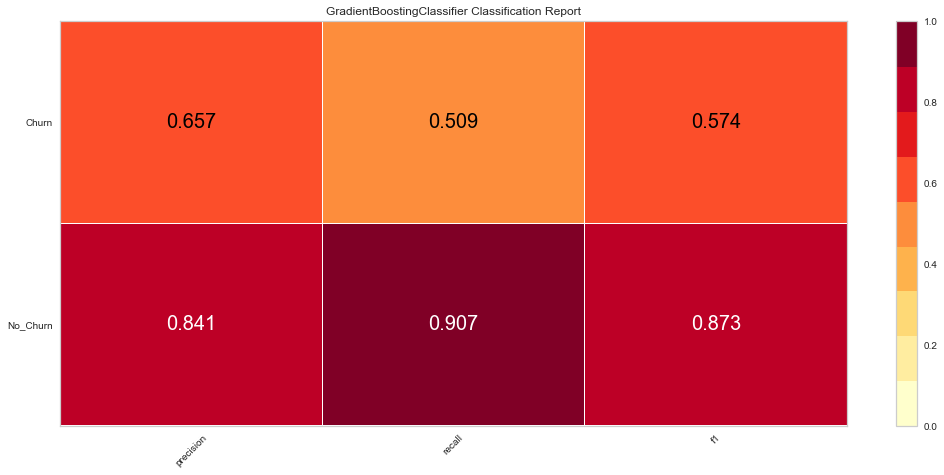

In [53]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [54]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8037542662116041
